In [1]:
import networkx as nx
from graph_utils import *

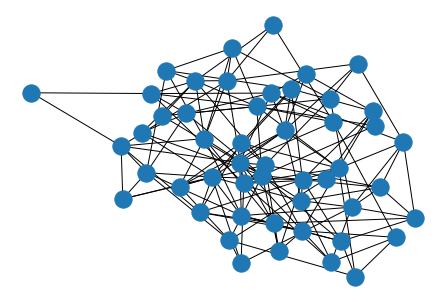

In [21]:
net = rand_network(50,170)
nx.draw(net)

In [22]:
nx.cycles.find_cycle(net)

[(15, 1), (1, 31), (31, 40), (40, 21), (21, 15)]

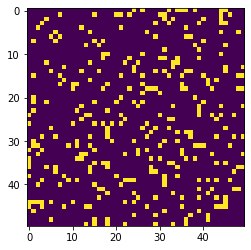

In [24]:
plt.imshow(nx.adjacency_matrix(net).toarray())

In [26]:
%pylab inline
import pandas as pd
import swifter
from dateparser import parse
import networkx as nx
from tqdm import tqdm    

tqdm.pandas()

def gen_edge(x):
    '''the edge (x1,y1) is the same as (y1,x1),
    even though the start station ids and end station ids 
    are flipped in the dataframe'''
    return tuple([str(i) for i in sorted((int(x.start_id), int(x.end_id)))])

Populating the interactive namespace from numpy and matplotlib


In [27]:
data = pd.read_csv('201809-citibike-tripdata.csv')
data = data.dropna(how='any')

data['start_id'] = data['start station id'].apply(int).apply(str)

data['end_id'] = data['end station id'].apply(int).apply(str)

data['edges'] = data.progress_apply(gen_edge, axis=1)

100%|██████████| 1877168/1877168 [01:05<00:00, 28723.90it/s]


In [28]:
start_map = {k:v for k,v in data[['start_id', 'start station name']].values}
end_map = {k:v for k,v in data[['end_id', 'end station name']].values}
start_map.update(end_map)
node_names = start_map.copy()
node_names

{'252': 'MacDougal St & Washington Sq',
 '314': 'Cadman Plaza West & Montague St',
 '3142': '1 Ave & E 62 St',
 '308': 'St James Pl & Oliver St',
 '345': 'W 13 St & 6 Ave',
 '3526': '31 St & 23 Ave',
 '358': 'Christopher St & Greenwich St',
 '285': 'Broadway & E 14 St',
 '319': 'Fulton St & Broadway',
 '3509': 'Lenox Ave & W 115 St',
 '3077': 'Stagg St & Union Ave',
 '500': 'Broadway & W 51 St',
 '3134': '3 Ave & E 62 St',
 '479': '9 Ave & W 45 St',
 '3558': 'Bergen St & Vanderbilt Ave',
 '3107': 'Bedford Ave & Nassau Ave',
 '350': 'Clinton St & Grand St',
 '3384': 'Smith St & 3 St',
 '302': 'Avenue D & E 3 St',
 '236': 'St Marks Pl & 2 Ave',
 '379': 'W 31 St & 7 Ave',
 '438': 'St Marks Pl & 1 Ave',
 '3561': '37 Ave & 35 St',
 '261': 'Johnson St & Gold St',
 '3002': 'South End Ave & Liberty St',
 '453': 'W 22 St & 8 Ave',
 '3256': 'Pier 40 - Hudson River Park',
 '3126': '44 Dr & Jackson Ave',
 '532': 'S 5 Pl & S 5 St',
 '3090': 'N 8 St & Driggs Ave',
 '412': 'Forsyth St & Canal St',
 '

In [ ]:
citi = nx.Graph()

nodes = set(data.start_id.unique()).union(set(data.end_id.unique()))
citi.add_nodes_from(nodes)

counts = data.groupby('edges').count().tripduration
durations = data.groupby('edges').mean().tripduration

for i,e in tqdm(enumerate(counts.index)):
    citi.add_edge(e[0],e[1],freq=counts[i],dur=durations[i])

In [126]:
import random

start, stop = random.sample(nodes,2)

nx.dijkstra_path(citi, start, stop, weight='dur')

In [128]:
nx.shortest_path(citi, start, stop)

['473', '173', '3541']

In [138]:
from networkx.algorithms import closeness_centrality
from networkx.algorithms import communicability

In [154]:
b_c = nx.betweenness_centrality(citi)

In [164]:
sorted([(v,k) for k,v in b_c.items()])[-10:]

[(0.003572294422348992, '426'),
 (0.003628637824156567, '486'),
 (0.0038342741187959604, '497'),
 (0.004015169323323779, '3142'),
 (0.0045077393742101336, '514'),
 (0.004832005314773408, '519'),
 (0.005689925905924755, '3016'),
 (0.0061164973410873106, '3129'),
 (0.006982909469936176, '327'),
 (0.008443370120747628, '534')]

In [165]:
sorted(citi.degree(), key=lambda x:x[1])[-10:]

[('312', 513),
 ('518', 515),
 ('229', 522),
 ('3142', 526),
 ('412', 538),
 ('265', 538),
 ('3016', 544),
 ('497', 553),
 ('402', 554),
 ('519', 575)]

In [75]:
citi.degree()

NameError: name 'citi' is not defined